## Intro to Matrices, Tensors and Images via numpy

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# A matrix can be viewed as a 2-dimensional array of numbers.
# It can be thought of as 
# a collection of row vectors, or a collection of column vectors.

# For example, the training set for the cat-brain problem can be
# expressed as a matrix.
# Each input instance to the machine can be viewed as a vector
# represented by a row in this matrix.
# Our training set consists of 15 examples, where each example is
#  a row vectorof size 2. So there are 15 rows and 2 columns.

X = np.array([[0.11, 0.09], [0.01, 0.02], [0.98, 0.91], [0.12, 0.21],
              [0.98, 0.99], [0.85, 0.87], [0.03, 0.14], [0.55, 0.45],
              [0.49, 0.51], [0.99, 0.01], [0.02, 0.89], [0.31, 0.47],
              [0.55, 0.29], [0.87, 0.76], [0.63, 0.24]])

#Output threat score will be modeled as a vector
y = np.array([-0.8, -0.97, 0.89, -0.67, 0.97, 0.72, -0.83, 0.00, 0.00,
              0.00, -0.09, -0.22, -0.16, 0.63, 0.37])

# Shape of the matrix is depicted as a list.
# The first list element represents the number of rows,
# the second list element represents the number of columns.
# Our training set consists of 15 examples, where each example is a
#  row vector of size 2. So the shape is [15, 2].
print("Shape of the matrix is: {}".format(X.shape))

# Slicing the matrix
# The matrix can be sliced using the indices representing the axes. 

# Accessing individual elements of the matrix
# Each element is indexed by its row and column.
# Row, column indices start from 0

# Accessing first element of the matrix
first_element = X[0, 0]
print("First element: {}".format(first_element))

# Accessing 5th row, first column of the matrix
print("X[5][1]: {}".format(X[5][1]))

# Accessing the rows
# Note the each row corresponds to one training example in our case.
# The : is shorthand to access all the elements of the selected rows
# i.e X[0, :] is equivalent of X[0, 0:num_columns]
row_1 = X[0, :] # First row has an index of 0
row_2 = X[1, 0:2] # Second row has an index of 1
print("Row 1: {} Shape: {}".format(row_1, row_1.shape))
print("Row 2: {} Shape: {}".format(row_2, row_2.shape))

# Accessing the columns
# The columns can similarly be accessed using the second axis.
# Note that each column corresponds to one feature i.e hardness or
# sharpness in our case.
column_1 = X[:, 0] # First column has an index of 0
column_2 = X[:, 1] #Second column has an index of 1
print("Column 1: {} Shape: {}".format(column_1, column_1.shape))
print("Column 2: {} Shape: {}".format(column_2, column_2.shape))

Shape of the matrix is: (15, 2)
First element: 0.11
X[5][1]: 0.87
Row 1: [0.11 0.09] Shape: (2,)
Row 2: [0.01 0.02] Shape: (2,)
Column 1: [0.11 0.01 0.98 0.12 0.98 0.85 0.03 0.55 0.49 0.99 0.02 0.31 0.55 0.87
 0.63] Shape: (15,)
Column 2: [0.09 0.02 0.91 0.21 0.99 0.87 0.14 0.45 0.51 0.01 0.89 0.47 0.29 0.76
 0.24] Shape: (15,)


In [3]:
# Extracting sub-matrices. Slicing and dicing
# We can use a combination of row and column to
# slice and dice the matrix (i.e., extract sub-matrices).

# For example to access the first 3 training examples
first_3_training_examples = X[:3, ]
# X[:3, ] == X[0:3,] == X[:3, :] == X[:3, 0:num_columns]
# These are multiple ways to access the same elements.
print("First 3 training examples:\n{}".format(first_3_training_examples))

# Selecting the hardness feature for  5th to 7th training examples
# Note that hardness corresponds to column 1
print("Hardness of 5-7 training examples is: {} ".format(X[5:8, 1]))

First 3 training examples:
[[0.11 0.09]
 [0.01 0.02]
 [0.98 0.91]]
Hardness of 5-7 training examples is: [0.87 0.14 0.45] 


### Tensors in numpy

Tensor with 3 dimensions: [[[4.16758356e-01 9.73423036e-01 2.56558453e-01]
  [9.20682512e-01 8.35209397e-01 6.40719548e-04]
  [1.51592449e-01 6.96266462e-01 2.64705895e-01]
  [7.05101749e-01 7.74952048e-01 7.32116631e-01]
  [6.33304071e-02 9.91619710e-01 6.99405185e-01]]

 [[8.81259740e-01 8.68539393e-01 3.87919011e-01]
  [3.19195793e-01 4.89295011e-01 1.18700528e-01]
  [9.25888715e-01 4.44403788e-01 6.83787216e-03]
  [9.22379124e-01 8.14299941e-01 7.21697820e-01]
  [4.68686881e-02 2.84375703e-01 4.27447059e-01]]

 [[7.27239023e-01 1.01038612e-02 1.53277038e-03]
  [6.28860818e-01 6.98160071e-01 6.51445943e-01]
  [8.06370852e-01 2.05669034e-01 1.08776670e-01]
  [1.50838536e-01 1.22783340e-01 5.01401089e-01]
  [9.31123769e-01 5.00993539e-01 3.61957870e-01]]

 [[3.28384498e-01 1.30660700e-01 2.09916047e-01]
  [6.86272574e-01 2.77816514e-01 5.71208901e-01]
  [9.67216983e-01 9.92761739e-02 3.34489464e-01]
  [9.95504319e-01 9.86358743e-01 4.47566893e-01]
  [4.31500728e-01 3.93329356e-01 7.01

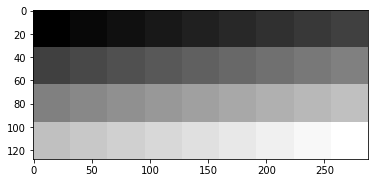

shape of RGB image = (198, 255, 3)
Pixel at 0,0 : [156 147 142]  Shape: (3,)
green channel image shape = (198, 255)


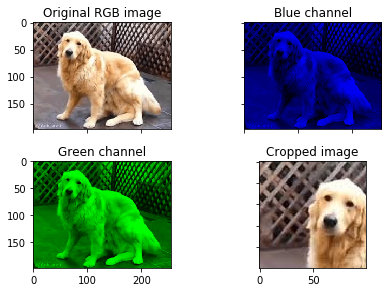

In [4]:
# np n-dimensional arrays arrays can be viewed as tensors.
# A vector can be viewed as a 1-tensor, a matrix is 2-tensor,
# a scalar is 0-tensor. So the same slicing and dicing mechanics are
# fully applicable to tensors
# Here we show how to generate a random numpy tensor of specified shape
tensor = np.random.random((5, 5, 3))
print("Tensor with 3 dimensions: {}".format(tensor))
print("Shape of the tensor: {}".format(tensor.shape))

#An image is a tensor really. For instance consider the I49 single
# channel (gray level) image.
I49 = np.array([[0,     8,  16, 24, 32, 40,   48,  56,  64],
                [64,   72,  80,  88,  96, 104, 112, 120, 128],
                [128, 136, 144, 152, 160, 168, 176, 184, 192],
                [192, 200, 208, 216, 224, 232, 240, 248, 255]],
               dtype=np.uint8)

# Display a numpy array (tensor) as image via opencv, after resizing
# to a bigger and more visble size.
img = cv2.resize(I49, (288, 128), interpolation=cv2.INTER_NEAREST)
plt.imshow(img, cmap='gray')
plt.show()


def load_rgb_img(img_path):
    img = cv2.imread(img_path)
    # The following line converts BGR images (as read by opencv)
    # into RGB images.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

fig, axs = plt.subplots(2, 2)
fig.tight_layout()
# A RGB image of width W, height H is a 3-tensor of shape [H, W, 3].
# For instance this 199x256 dog image.
img = load_rgb_img('../../Figures/dog3.jpg') 
print("shape of RGB image = {}".format(img.shape))
axs[0, 0].imshow(img)
axs[0, 0].set_title('Original RGB image')

# 
# Slicing and dicing tensors
# The same logic of using indices to access elements applies to tensors. 
# For example, to access a single element in the tensor, we will need to
# provide 3 indices corresponding to the 3 axes.
# To acess RGB values of pixel at (row=12, col=30).
print("Pixel at 0,0 : {}  Shape: {}".format(img[12, 30, :],
                                            img[12, 30, :].shape ))

# Extract the Green channel of the dog image:
img_g = img[:, :, 1]
print("green channel image shape = {}".format(img_g.shape))

# Darken R and G channel of the image (so only Blue remains)
img_b = img
img_b[:, :, 0] = 0
img_b[:, :, 1] = 0
axs[0, 1].imshow(img_b)
axs[0, 1].set_title('Blue channel')

# Darken R and B channel of the image (so only Green remains)
img_g = load_rgb_img('../../Figures/dog3.jpg') 
img_g[:, :, 0] = 0
img_g[:, :, 2] = 0
axs[1, 0].imshow(img_g)
axs[1, 0].set_title('Green channel')

# Cropping a 100x100 subimage out from the top left corner of the dog image
img = load_rgb_img('../../Figures/dog3.jpg') 
img_cropped = img[0:100, 0:100, :]
axs[1, 1].imshow(img_cropped)
axs[1, 1].set_title('Cropped image')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.show()

## Intro Tensors (matrices) via PyTorch 

In [5]:
from __future__ import print_function
import torch
Y = torch.tensor([[0.11, 0.09], [0.01, 0.02], [0.98, 0.91],
                  [0.12, 0.21], [0.98, 0.99], [0.85, 0.87],
                  [0.03, 0.14], [0.55, 0.45], [0.49, 0.51],
                  [0.99, 0.01], [0.02, 0.89], [0.31, 0.47],
                  [0.55, 0.29], [0.87, 0.76], [0.63, 0.24]],
                 dtype=torch.float64)
print(Y.size())

# a tensor can be converted to a numpy array. We initialized the
# torch tensor Y and the numpy array X from same values, hence they
# should be very close values. Here we verify that they are all
# close within a tolerance of 1e-7.
# Note the numpy function allclose.
print(np.allclose(X, Y.numpy(), rtol=1e-7))

# torch tensors can be initialized from numpy arrays too.
print(np.allclose(torch.from_numpy(X), Y, 1e-7))

# All the numpy array slicing dicing operations can be done on
# torch tensors too.
print(Y[3, :])
print(Y[3:5, 1:2])

# Torch tensors can be added, subtracted (like numpy arrays)
print(torch.from_numpy(X) - Y)

torch.Size([15, 2])
True
True
tensor([0.1200, 0.2100], dtype=torch.float64)
tensor([[0.2100],
        [0.9900]], dtype=torch.float64)
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], dtype=torch.float64)
